In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [46]:
df = pd.read_csv('BankChurners.csv')
y = df['Attrition_Flag'].to_numpy()
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Univariate Analyses - histograms for continuous features, countplots for categorical features

In [47]:
# I have done this in the previous exercise

Bivariate Analysis - Relationship with Attrition for all variables.  Here is where I can work next, figure out hypothesis tests.

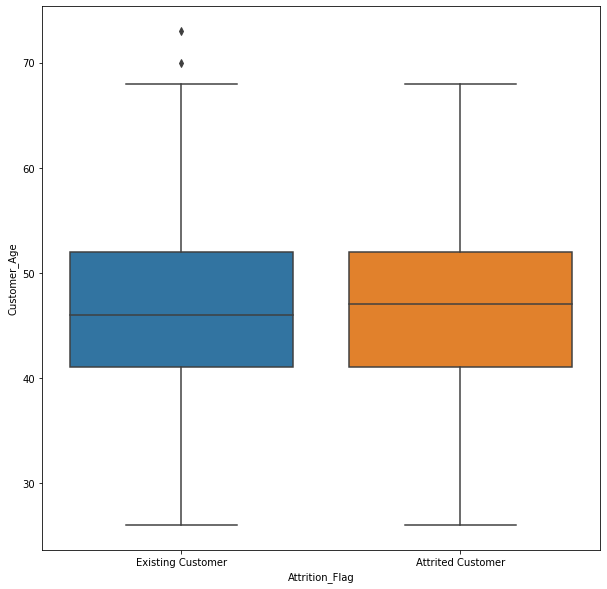

In [48]:
# my example is for a prediction of a continuous variable, mine is categorical, binary.
# Start with customer Age, boxplot for attrited and existing
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)
plt.show()

In [49]:
df[['Attrition_Flag', 'Customer_Age']].groupby(['Attrition_Flag'], as_index=False).mean().sort_values(by='Customer_Age', ascending=False)

,Attrition_Flag,Customer_Age
0,Attrited Customer,46.659496
1,Existing Customer,46.262118


The mean age for an existing customer is 46.26 years, for an attrited customer it is 46.66 years.

<h3>Description of boxplot</h3>
<ul>
  <li>The only outliers are a couple old existing customers</li>
  <li>The mean age is roughly similar at 46.26 ~ 46.66.  The median age is similar with 46 ~ 47.</li>  
  <li>The IQR is similar for each boxplot</li>
  <li>The data here is almost identical, I do not suspect customer age to have much affect customer attrition.</li>
</ul>

<h3>Hypothesis Test for relationshop between customer age and attrition</h3>

<p>Null Hypothesis - There is no difference in mean age of attrited customers and existing customers</p>
<p>Alternative Hypothesis - There is a difference in mean age of attrited customers and existing customers</p>

In [50]:
df_temp = df[(np.abs(stats.zscore(df["Customer_Age"])) < 3)] 

existing = df_temp[df_temp['Attrition_Flag'] == 'Existing Customer']['Customer_Age']
attrited = df_temp[df_temp['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']

existing = existing.values.tolist()
existing = random.sample(existing, 100)
attrited = attrited.values.tolist()
attrited = random.sample(attrited, 100)

In [51]:
ttest, pval = ttest_ind(existing, attrited, equal_var=False)
print('ttest', ttest)
print('p value', pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -1.2426998370678877
p value 0.21546051022261434
we accept null hypothesis


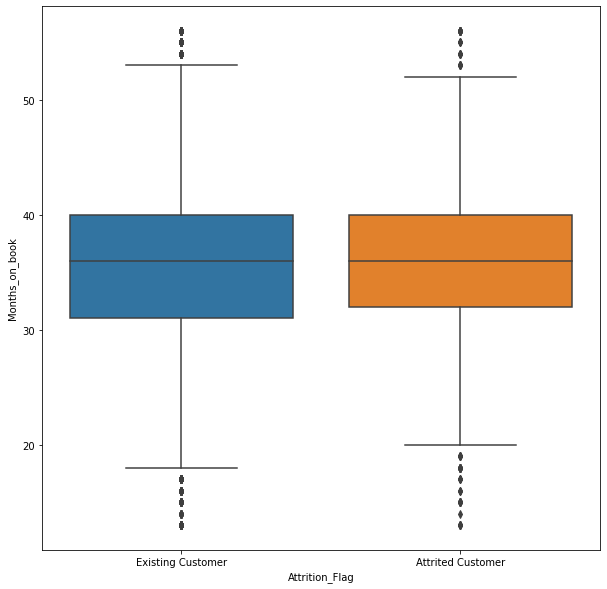

In [52]:
# my example is for a prediction of a continuous variable, mine is categorical, binary.
# Start with customer Age, boxplot for attrited and existing
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df)
plt.show()

In [53]:
df[['Attrition_Flag', 'Months_on_book']].groupby(['Attrition_Flag'], as_index=False).mean().sort_values(by='Months_on_book', ascending=False)

,Attrition_Flag,Months_on_book
0,Attrited Customer,36.178242
1,Existing Customer,35.880588


<h3>Hypothesis Test for relationshop between customer months on book and attrition</h3>

<p>Null Hypothesis - There is no difference in months on book for attrited customers and existing customers</p>
<p>Alternative Hypothesis - There is a difference in months on book for attrited customers and existing customers</p>

In [54]:
df_temp = df[(np.abs(stats.zscore(df['Months_on_book'])) < 3)] 

existing = df_temp[df_temp['Attrition_Flag'] == 'Existing Customer']['Months_on_book']
attrited = df_temp[df_temp['Attrition_Flag'] == 'Attrited Customer']['Months_on_book']

existing = existing.values.tolist()
existing = random.sample(existing, 100)
attrited = attrited.values.tolist()
attrited = random.sample(attrited, 100)

In [55]:
ttest, pval = ttest_ind(existing, attrited, equal_var=False)
print('ttest', ttest)
print('p value', pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 0.15394422973328578
p value 0.8778105415774
we accept null hypothesis


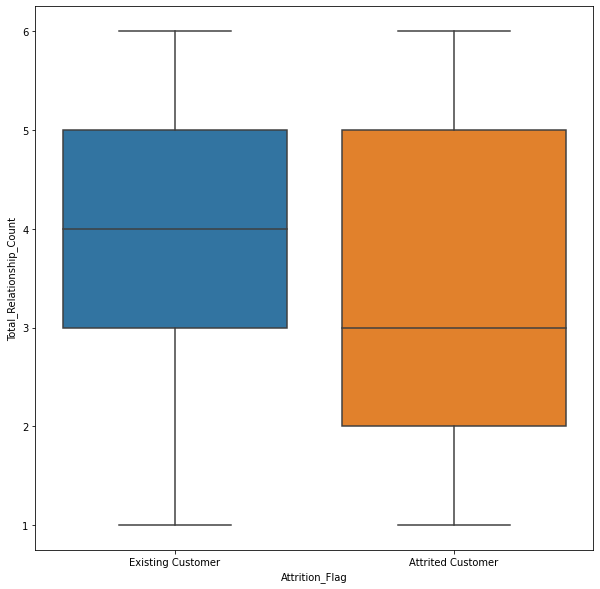

In [56]:


# my example is for a prediction of a continuous variable, mine is categorical, binary.
# Start with customer Age, boxplot for attrited and existing
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)
plt.show()

In [57]:
df[['Attrition_Flag', 'Total_Relationship_Count']].groupby(['Attrition_Flag'], as_index=False).mean().sort_values(by='Total_Relationship_Count', ascending=False)

,Attrition_Flag,Total_Relationship_Count
1,Existing Customer,3.914588
0,Attrited Customer,3.279656


<h3>Hypothesis Test for relationshop between customer relationship count and attrition</h3>

<p>Null Hypothesis - There is no difference in relationship count for attrited customers and existing customers</p>
<p>Alternative Hypothesis - There is a difference in relationship count for attrited customers and existing customers</p>

In [58]:
df_temp = df[(np.abs(stats.zscore(df['Total_Relationship_Count'])) < 3)] 

existing = df_temp[df_temp['Attrition_Flag'] == 'Existing Customer']['Total_Relationship_Count']
attrited = df_temp[df_temp['Attrition_Flag'] == 'Attrited Customer']['Total_Relationship_Count']

existing = existing.values.tolist()
existing = random.sample(existing, 100)
attrited = attrited.values.tolist()
attrited = random.sample(attrited, 100)

In [59]:
ttest, pval = ttest_ind(existing, attrited, equal_var=False)
print('ttest', ttest)
print('p value', pval)

if pval <0.05:
    print("we reject null hypothesis")
    print('This feature should be important in determining customer attrition')
else:
    print("we accept null hypothesis")

ttest 3.449170163194647
p value 0.0006887437010537234
we reject null hypothesis
This feature should be important in determining customer attrition


<h1>Bivariate Analysis for Categorical Variables</h1>

<h3>Education Level</h3>

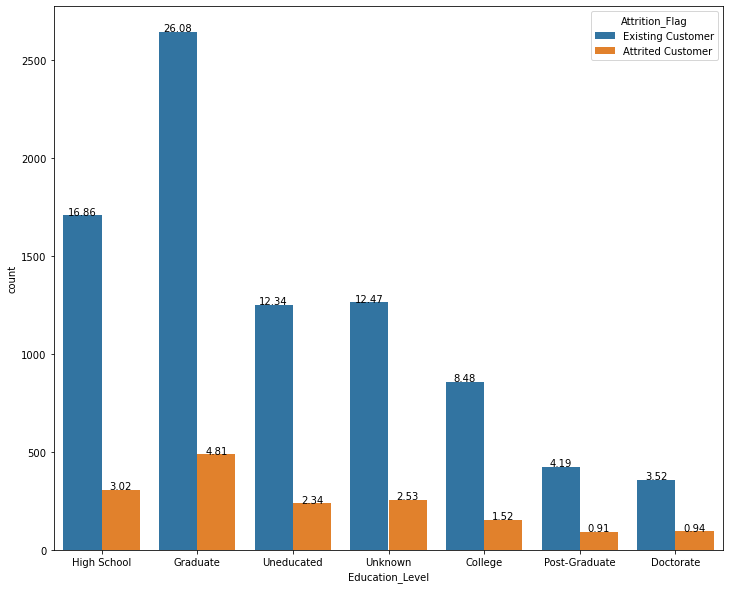

In [60]:
# for the categorical variables it is similar to workclass, do this on the fly
plt.figure(figsize=(12,10))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x="Education_Level", hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [61]:
nbr = df['Education_Level'].unique()
nbr

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

<h3>Chi-Squared Test</h3>

<p>Determines if there is a significant difference between an expected distribution and an actual distribution.</p>
<p>For our example, the plot above is an actual distribution since it is from our data</p>
<p>What is our expected distribution?</p>

In [62]:
# contingency table
c_t = pd.crosstab(df['Education_Level'].sample(frac=0.002, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.002, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,0,4
Doctorate,0,4
Graduate,0,2
High School,0,4
Uneducated,1,1
Unknown,1,3


This table is to determine whether variables are contingent one each other.  Does customer attrition depend on education level or are they independent?  Hard to tell from table, we will use a Pearson Chi-Squared test

<h3>Hypothesis Test for relationship between education level and attrition</h3>

<p>Null Hypothesis - There is no relationship between education level and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between education level and customer attrition</p>

In [63]:


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
else:
    print('Independent - Accept Null Hypothesis')

dof=5
p_value 0.29555700404248264
[[0.4 3.6]
 [0.4 3.6]
 [0.2 1.8]
 [0.4 3.6]
 [0.2 1.8]
 [0.4 3.6]]
probability=0.950, critical=11.070, stat=6.111
Independent - Accept Null Hypothesis


Since the test accepted the null hypothesis we have no dependency of education level on the target variable of Attrition Flag

<h3>Hypothesis Test for relationship between Income and Attrition</h3>

<p>Null Hypothesis - There is no relationship between income and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between income and customer attrition</p>

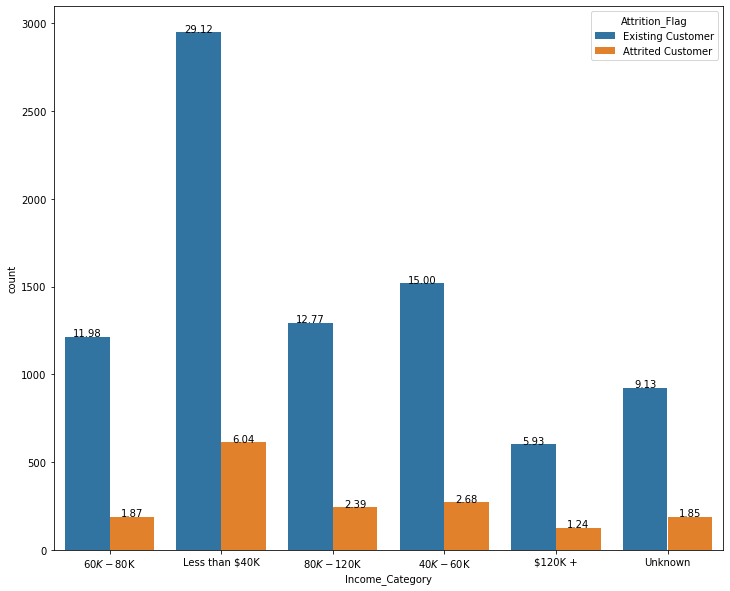

In [64]:
# for the categorical variables it is similar to workclass, do this on the fly
plt.figure(figsize=(12,10))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x='Income_Category', hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [65]:
# contingency table --> example usese frac=0.002
c_t = pd.crosstab(df['Income_Category'].sample(frac=0.01, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.01, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,1,6
$40K - $60K,2,20
$60K - $80K,0,11
$80K - $120K,2,12
Less than $40K,7,26
Unknown,2,12


In [66]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
else:
    print('Independent - Accept Null Hypothesis')

dof=5
p_value 0.5951371442685823
[[ 0.97029703  6.02970297]
 [ 3.04950495 18.95049505]
 [ 1.52475248  9.47524752]
 [ 1.94059406 12.05940594]
 [ 4.57425743 28.42574257]
 [ 1.94059406 12.05940594]]
probability=0.950, critical=11.070, stat=3.688
Independent - Accept Null Hypothesis


<h3>Hypothesis Test for relationship between Card Category and Attrition</h3>

<p>Null Hypothesis - There is no relationship between card category and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between card category and customer attrition</p>

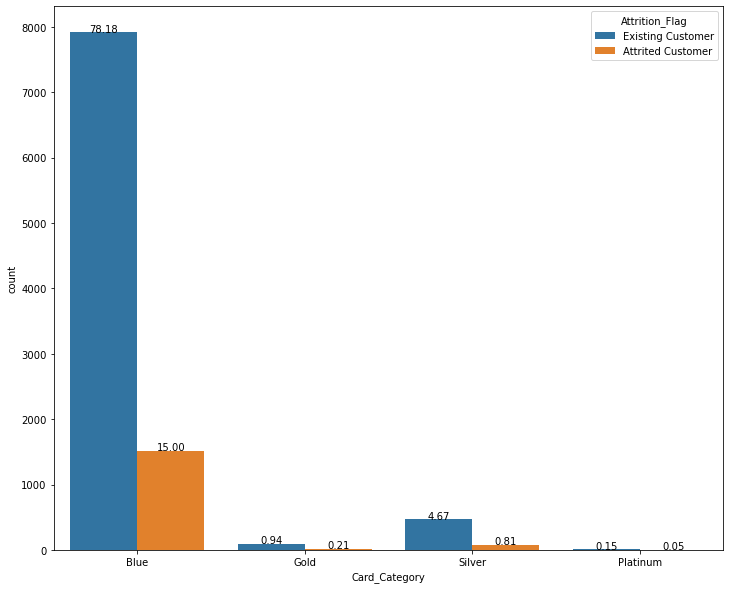

In [67]:
#  Card Category analysis
# for the categorical variables it is similar to workclass, do this on the fly
plt.figure(figsize=(12,10))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x='Card_Category', hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [68]:
c_t = pd.crosstab(df['Card_Category'].sample(frac=0.01, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.01, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,13,82
Gold,1,1
Silver,0,4


In [69]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
else:
    print('Independent - Accept Null Hypothesis')

dof=2
p_value 0.2424671102172388
[[13.16831683 81.83168317]
 [ 0.27722772  1.72277228]
 [ 0.55445545  3.44554455]]
probability=0.950, critical=5.991, stat=2.834
Independent - Accept Null Hypothesis


<h3>Hypothesis Test for relationship between Gender and Attrition</h3>

<p>Null Hypothesis - There is no relationship between gender and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between gender and customer attrition</p>

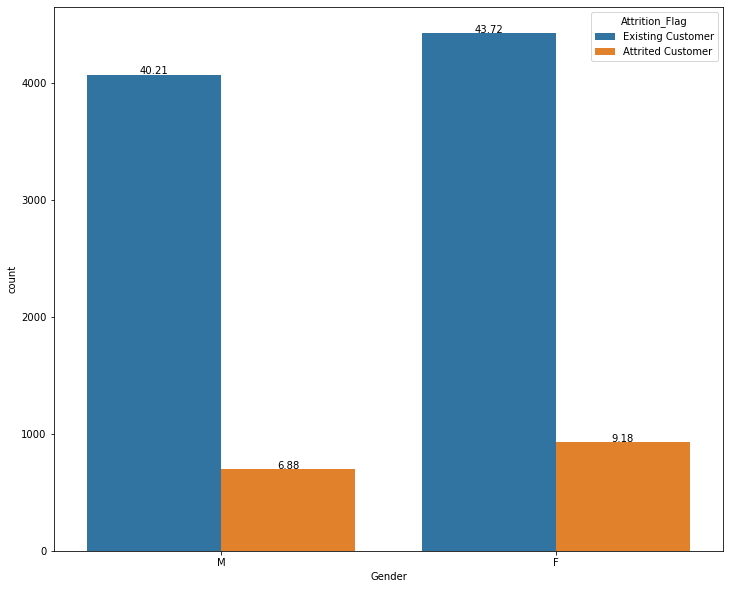

In [70]:
plt.figure(figsize=(12,10))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x='Gender', hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [71]:
c_t = pd.crosstab(df['Gender'].sample(frac=0.01, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.01, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,11,45
M,3,42


In [72]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
else:
    print('Independent - Accept Null Hypothesis')

dof=1
p_value 0.11271551453890269
[[ 7.76237624 48.23762376]
 [ 6.23762376 38.76237624]]
probability=0.950, critical=3.841, stat=2.516
Independent - Accept Null Hypothesis


<h3>Hypothesis Test for relationship between Gender and Attrition</h3>

<p>Null Hypothesis - There is no relationship between gender and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between gender and customer attrition</p>

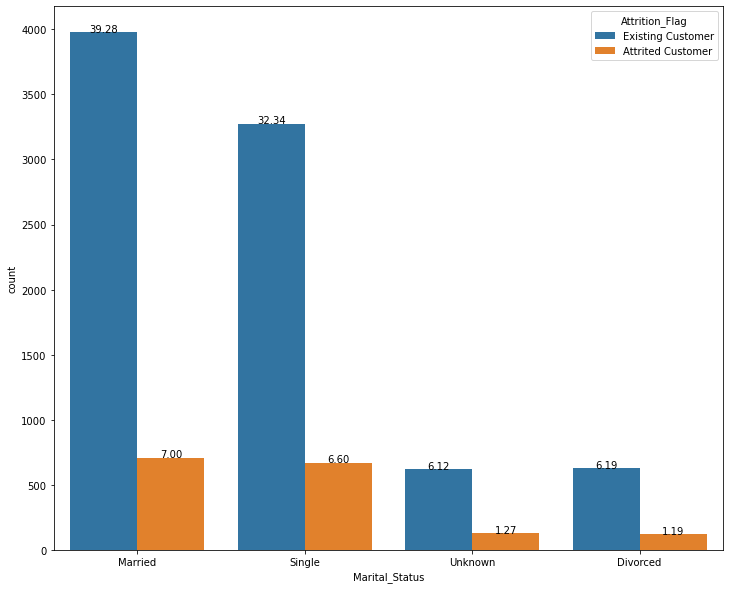

In [73]:
plt.figure(figsize=(12,10))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x='Marital_Status', hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [74]:
c_t = pd.crosstab(df['Marital_Status'].sample(frac=0.01, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.01, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,2,4
Married,5,42
Single,5,38
Unknown,2,3


In [75]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
else:
    print('Independent - Accept Null Hypothesis')

dof=3
p_value 0.14757544753458104
[[ 0.83168317  5.16831683]
 [ 6.51485149 40.48514851]
 [ 5.96039604 37.03960396]
 [ 0.69306931  4.30693069]]
probability=0.950, critical=7.815, stat=5.355
Independent - Accept Null Hypothesis
